# Test Env

Import data.

In [1]:
%load_ext autoreload
%autoreload 2

import dgym as dg
from dgym import collection, repertoire

# load all data
print('load data')
path = '../dgym-data'

deck = collection.from_sdf(
    f'{path}/DSi-Poised_Library_annotated.sdf',
    reactant_names=['reagsmi1', 'reagsmi2', 'reagsmi3']
)

repertoire = repertoire.from_json(
    path = f'{path}/All_Rxns_rxn_library.json',
    smarts_col = 'reaction_string',
    classes_col = 'functional_groups'
)

building_blocks = dg.datasets.enamine(f'{path}/Enamine_Building_Blocks_Stock_262336cmpd_20230630.sdf')
fingerprints = dg.datasets.fingerprints(f'{path}/out/Enamine_Building_Blocks_Stock_262336cmpd_20230630.fpb')

# align fingerprints to building blocks
print('align fingerprints')
fingerprints = dg.utils.sort_fingerprints(fingerprints, building_blocks)

# partition building blocks according to functional groups
print('partition building blocks')
templates = dg.utils.get_unique_reactants(repertoire)
building_blocks = dg.utils.partition_building_blocks(building_blocks, templates, out_dir=path)

load data
align fingerprints
partition building blocks


In [151]:
from dgym.envs.library_designer import LibraryDesigner

library_designer = LibraryDesigner(
    repertoire,
    building_blocks,
    fingerprints
)

In [158]:
drug_env.action_mask.sum()

9980

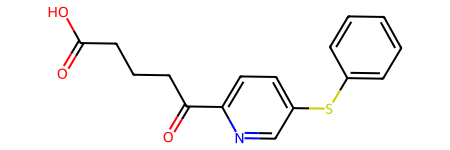

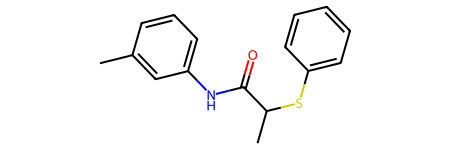

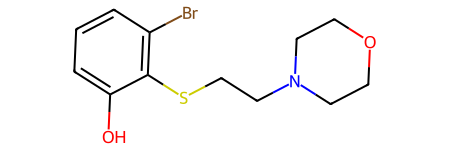

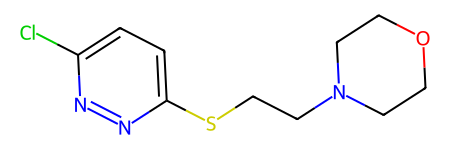

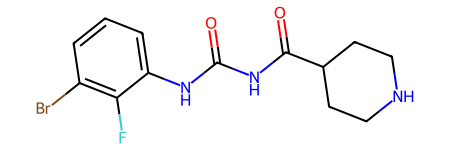

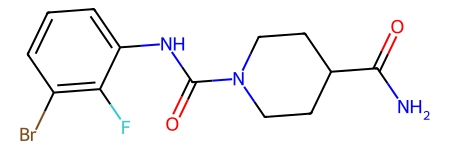

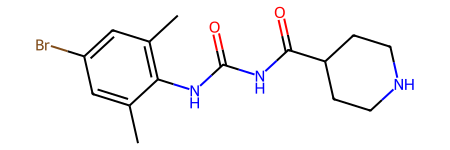

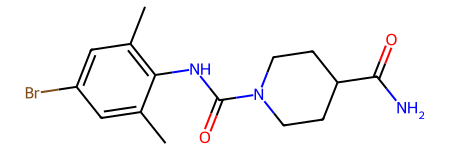

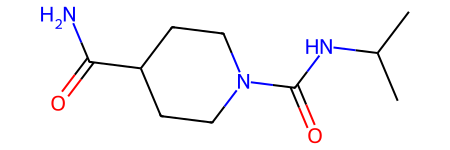

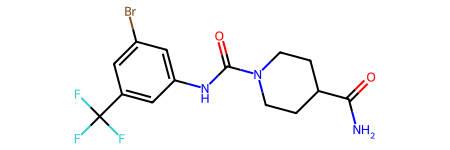

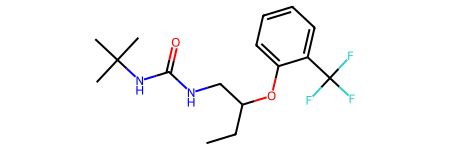

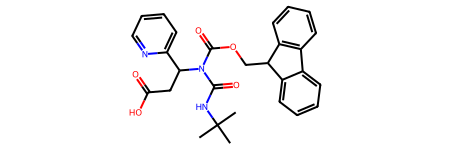

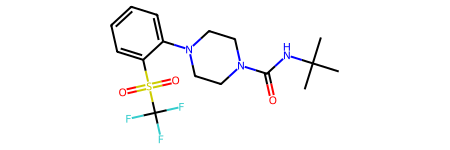

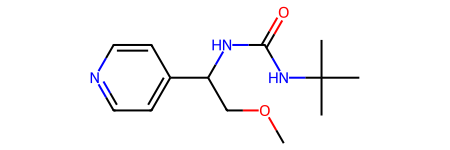

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [153]:
from dgym.envs import DrugEnv

drug_env = DrugEnv(library_designer, library=list(deck[:6]))

action = {
    'design': {
        'selected_molecules': [0, 1],
        'num_analogs': 2,
        'percent_random': 1.0
    }
}

drug_env.step(action)
[display(p) for p in drug_env.library[6:]]